In [63]:
import tensorflow as tf 
import numpy as np # linear algebra
import pandas as pd # data processing
import os

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

DATASET_PATH  = '/home/sarthak/Research-Scholars-Day-Hackathon-Hackathon/Training_Data'
COVID_IMAGES_ZIP_PATH = DATASET_PATH + "/CT_COVID.zip"
NON_COVID_IMAGES_ZIP_PATH = DATASET_PATH + "/CT_NonCOVID.zip"

COVID_IMAGES_PATH = '/home/sarthak/Research-Scholars-Day-Hackathon-Hackathon/CT_COVID'
NON_COVID_IMAGES_PATH = '/home/sarthak/Research-Scholars-Day-Hackathon-Hackathon/CT_NonCOVID'
IMAGE_SIZE    = (150, 150)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 20
LEARNING_RATE =0.0005 #start off with high rate first 0.001 #5e-4


os.system("unzip " + COVID_IMAGES_ZIP_PATH)
os.system("unzip " + NON_COVID_IMAGES_ZIP_PATH)

os.system('rm -rf Final_Training_Set')
os.system("mkdir Final_Training_Set")
os.system("mv CT_COVID Final_Training_Set/")
os.system("mv CT_NonCOVID Final_Training_Set/")

Final_Tr_PATH = '/home/sarthak/Research-Scholars-Day-Hackathon-Hackathon/Final_Training_Set'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

train_batches = train_datagen.flow_from_directory(Final_Tr_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                  )

valid_batches = train_datagen.flow_from_directory(Final_Tr_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  )


Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


/home/sarthak/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [64]:
#Simple CNN model based on VGG16

import keras
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation = 'tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

In [65]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch = STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )

60
15


/home/sarthak/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/sarthak/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
59/59 [==============================] - 128s 2s/step - loss: 0.7487 - acc: 0.5561 - val_loss: 0.6716 - val_acc: 0.5429
Epoch 2/20
59/59 [==============================] - 128s 2s/step - loss: 0.6374 - acc: 0.6241 - val_loss: 0.6036 - val_acc: 0.6643
Epoch 3/20
59/59 [==============================] - 125s 2s/step - loss: 0.5685 - acc: 0.6820 - val_loss: 0.5547 - val_acc: 0.7214
Epoch 4/20
59/59 [==============================] - 121s 2s/step - loss: 0.6204 - acc: 0.6837 - val_loss: 0.6029 - val_acc: 0.6857
Epoch 5/20
59/59 [==============================] - 122s 2s/step - loss: 0.5990 - acc: 0.6684 - val_loss: 0.5580 - val_acc: 0.7000
Epoch 6/20
59/59 [==============================] - 125s 2s/step - loss: 0.5581 - acc: 0.7160 - val_loss: 0.6151 - val_acc: 0.6857
Epoch 7/20
59/59 [==============================] - 125s 2s/step - loss: 0.5738 - acc: 0.7024 - val_loss: 0.5987 - val_acc: 0.6714
Epoch 8/20
59/59 [==============================] - 122s 2s/step - loss: 0.5519 - a

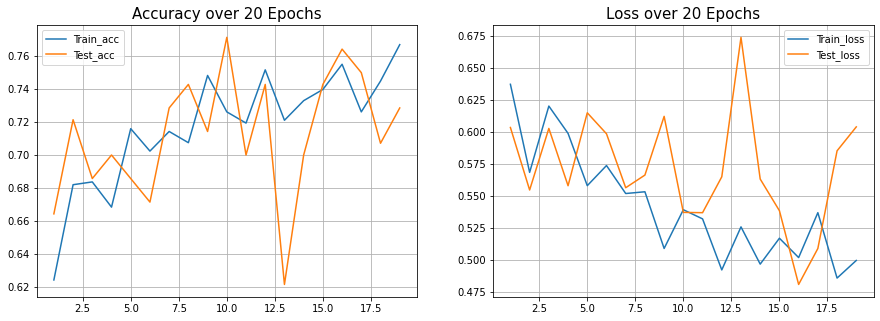

In [69]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))   
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 20)